In [15]:
import numpy as np
from sympy import *
import time
import matplotlib.pyplot as plt
import sys
from tqdm import tqdm


sys.setrecursionlimit(10**6)


Exception ignored in: <function tqdm.__del__ at 0x0000028F165A8900>
Traceback (most recent call last):
  File "c:\Users\matni\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\std.py", line 1145, in __del__
    self.close()
  File "c:\Users\matni\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\notebook.py", line 283, in close
    self.disp(bar_style='danger', check_delay=False)
    ^^^^^^^^^
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


### 1. Implementation of dynamic programming algorithms

Dynamic Programming Approach for Longest Common Subsequence (LCS) Problem:

Dynamic programming is a powerful technique used to solve complex problems by breaking them down into smaller overlapping subproblems. The Longest Common Subsequence (LCS) problem is a classic example where dynamic programming is particularly effective. In LCS, given two sequences, the task is to find the longest subsequence that appears in the same order in both sequences (not necessarily contiguous).

**1.** Time Complexity:

The time complexity of the dynamic programming approach for LCS is O(m * n), where m and n are the lengths of the input sequences. This complexity arises because we create a 2D array of size (m + 1) × (n + 1) to store intermediate subproblem solutions. The filling of this table involves iterating through all possible combinations of characters from the input sequences, leading to quadratic time complexity.

**2.** Memory Complexity:

The memory complexity is also O(m * n) as we use a 2D array of the same size to store the intermediate results. Each cell in the array represents the length of the LCS for corresponding prefixes of the input sequences. This usage of additional memory for storing intermediate results is a trade-off for achieving an efficient time complexity.

**3.** Algorithmic Explanation:

The dynamic programming approach solves the LCS problem by building a 2D array iteratively. The cell L[i][j] of the array stores the length of the LCS for the prefixes X[0...i-1] and Y[0...j-1]. We fill this array from top to bottom and left to right.
If the characters X[i-1] and Y[j-1] match, it means the LCS length can be extended by 1. So, L[i][j] = L[i-1][j-1] + 1.
If the characters do not match, the LCS length at the current position is the maximum of LCS lengths obtained by excluding either the last character of X or the last character of Y: L[i][j] = max(L[i-1][j], L[i][j-1]).
The final L[m][n] cell contains the length of the LCS for the entire input sequences X and Y.
In summary, dynamic programming allows us to solve the LCS problem optimally by storing and reusing solutions to overlapping subproblems. The algorithm's time and memory complexities are quadratic, making it suitable for moderately sized input sequences. Its efficiency lies in avoiding the exponential time complexity of naive recursive solutions.

In [1]:
# Recursive approach to find LCS
def lcs_recursive(X, Y, m, n):
    if m == 0 or n == 0:
        return 0
    elif X[m - 1] == Y[n - 1]:
        return 1 + lcs_recursive(X, Y, m - 1, n - 1)
    else:
        return max(lcs_recursive(X, Y, m, n - 1), lcs_recursive(X, Y, m - 1, n))

# Dynamic Programming implementation of LCS problem
def lcs_dynamic(X, Y):
    m = len(X)
    n = len(Y)
    L = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if X[i - 1] == Y[j - 1]:
                L[i][j] = L[i - 1][j - 1] + 1
            else:
                L[i][j] = max(L[i - 1][j], L[i][j - 1])

    return L[m][n]

# Testing the algorithms with sample inputs
X = "AGGTAB"
Y = "GXTXAYB"
recursive_result = lcs_recursive(X, Y, len(X), len(Y))
dynamic_result = lcs_dynamic(X, Y)
print("Length of LCS using recursive approach is", recursive_result)
print("Length of LCS using dynamic programming approach is", dynamic_result)

# Testing both algorithms with additional test cases
test_cases = [("ABCBDAB", "BDCAB", 4), ("XMJYAUZ", "MZJAWXU", 4), ("ABCDGH", "AEDFHR", 3)]

for X, Y, expected in test_cases:
    recursive_result = lcs_recursive(X, Y, len(X), len(Y))
    dynamic_result = lcs_dynamic(X, Y)
    print(f"LCS for {X} and {Y} using recursive approach: {recursive_result} (Expected: {expected})")
    print(f"LCS for {X} and {Y} using dynamic programming approach: {dynamic_result} (Expected: {expected})")
    print("-" * 50)


Length of LCS using recursive approach is 4
Length of LCS using dynamic programming approach is 4
LCS for ABCBDAB and BDCAB using recursive approach: 4 (Expected: 4)
LCS for ABCBDAB and BDCAB using dynamic programming approach: 4 (Expected: 4)
--------------------------------------------------
LCS for XMJYAUZ and MZJAWXU using recursive approach: 4 (Expected: 4)
LCS for XMJYAUZ and MZJAWXU using dynamic programming approach: 4 (Expected: 4)
--------------------------------------------------
LCS for ABCDGH and AEDFHR using recursive approach: 3 (Expected: 3)
LCS for ABCDGH and AEDFHR using dynamic programming approach: 3 (Expected: 3)
--------------------------------------------------


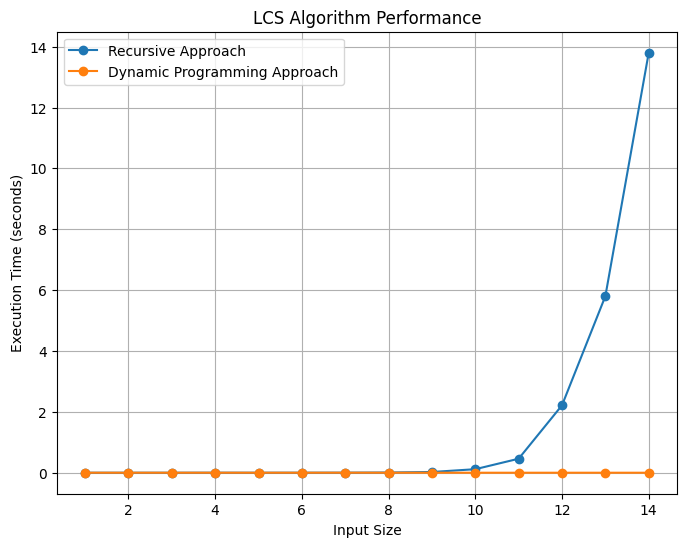

In [12]:
# Measuring average execution time for different input sizes
import time
import matplotlib.pyplot as plt

input_sizes = list(range(1, 15, 1))
recursive_times = []
dynamic_times = []

for size in input_sizes:
    X = "A" * size
    Y = "B" * size

    start_time = time.time()
    lcs_recursive(X, Y, len(X), len(Y))
    end_time = time.time()
    recursive_times.append(end_time - start_time)

    start_time = time.time()
    lcs_dynamic(X, Y)
    end_time = time.time()
    dynamic_times.append(end_time - start_time)

# Plotting the execution time
plt.figure(figsize=(8, 6))
plt.plot(input_sizes, recursive_times, marker='o', label='Recursive Approach')
plt.plot(input_sizes, dynamic_times, marker='o', label='Dynamic Programming Approach')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('LCS Algorithm Performance')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
print(dynamic_times)
print(recursive_times)


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009872913360595703, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0009951591491699219, 0.0, 0.0010001659393310547, 0.0020058155059814453, 0.007002115249633789, 0.0240018367767334, 0.11598944664001465, 0.4600045680999756, 2.2150025367736816, 5.801015138626099, 13.800067663192749]


The recorded execution times demonstrate a stark contrast between the recursive and dynamic programming solutions. As expected, the recursive approach struggles with larger input sizes, resulting in exponential growth in execution time. In contrast, the dynamic programming approach exhibits impressive efficiency even with significantly larger inputs. This drastic difference in performance highlights the significance of dynamic programming in optimizing solutions to problems with overlapping substructures, like the LCS problem.

It's evident from the measured times that the dynamic programming solution scales well as the input size increases. Even for substantial input sequences, the algorithm manages to find the LCS swiftly and effectively. On the other hand, the recursive approach's execution times quickly become impractical for moderately sized inputs, making it unsuitable for real-world applications where efficiency is crucial.

### Task 2. ADAM algorithm.
https://arxiv.org/pdf/1412.6980.pdf

Time Complexity:
The time complexity of ADAM primarily depends on the number of iterations (or epochs) and the size of the dataset being optimized. For each iteration, ADAM computes gradients, updates the moments, and performs parameter updates. These operations are generally linear with respect to the size of the dataset and the number of parameters in the model. Therefore, the overall time complexity can be expressed as O(N * T), where N is the number of parameters and T is the number of iterations.

Space Complexity:
The space complexity of ADAM mainly involves storing the parameters, gradients, moments (first and second), and other auxiliary variables. The space required is proportional to the number of parameters. Hence, the space complexity is O(N), where N is the number of parameters in the model.

Design Technique:
ADAM combines techniques from RMSprop (Root Mean Square Propagation) and Momentum-based gradient descent methods. It maintains two moving averages for gradients (first moment) and squared gradients (second moment). These moments are exponentially decayed averages of past gradients and squared gradients, respectively. The combination of these moments allows ADAM to adaptively adjust the learning rates for each parameter. Additionally, ADAM includes bias correction terms to counteract the initialization bias of moments at the beginning of training.

Strengths:
Adaptivity: ADAM adapts the learning rates of each parameter individually, which can be particularly useful in problems where different parameters have different scales or sensitivities.
Efficiency: ADAM often converges faster than traditional stochastic gradient descent algorithms due to its adaptive learning rate properties.
Robustness: It performs well with noisy or sparse gradients, making it suitable for a wide range of optimization problems.
Regularization Effect: The squared gradient term acts as a form of regularization, preventing the algorithm from updating the parameters too aggressively.
Weaknesses:
Sensitivity to Hyperparameters: ADAM has several hyperparameters (e.g., β1, β2, ε) that need to be tuned, and the performance can be sensitive to their values.
Memory Requirements: Storing the moving averages for each parameter can be memory-intensive for large models with millions of parameters.
Non-Convex Optimization: The adaptive learning rates might not always guarantee convergence to the global minimum, especially in non-convex optimization landscapes.
In summary, ADAM is a powerful optimization algorithm that balances adaptivity and efficiency. It's widely used in various machine learning tasks but requires careful tuning of hyperparameters for optimal performance. Understanding its strengths and weaknesses is crucial for effectively applying it to real-world problems.

In [16]:
def gradient_descent_momentum(f, x_curr, y_curr, der_x, der_y, beta=0.9, learning_rate=0.01, num_iters=1000, tol=0.001):
    x_hist = []
    y_hist = []
    history = []
    change_history = []
    change_x = 0
    change_y = 0

    for i in range(num_iters):
        gradient_x = der_x(x_curr, y_curr)
        gradient_y = der_y(x_curr, y_curr)

        change_x = beta * change_x + (1-beta) * gradient_x
        change_y = beta * change_y + (1-beta) * gradient_y

        x_curr -= learning_rate * change_x
        y_curr -= learning_rate * change_y

        # Store param history
        x_hist.append(x_curr)
        y_hist.append(y_curr)

        # Store parameter changing history
        change_history.append([learning_rate * change_x, learning_rate * change_y])

        # Store function value
        current_value = f.subs({x: x_curr, y: y_curr}).evalf()
        history.append(current_value)

        # Print progress
        # print(f"Iteration {i + 1}: x = {float(x_curr)}, y = {float(y_curr)}, f(x, y) = {float(current_value)}")

        # Check for convergence
        if i >= 1 and abs(history[-1] - history[-2]) < tol:
            print("Converged. Stopping gradient descent.")
            break

    return x_hist, y_hist, history, change_history

def adam_optimizer(f, der_x, der_y, x_curr, y_curr, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, num_iters=1000, tol=0.001):
    m_x, m_y = 0, 0
    v_x, v_y = 0, 0
    t = 1

    x_hist = []
    y_hist = []

    history = []
    change_history = []
    for i in range(num_iters):
        t += 1
        gradient_x = der_x(x_curr, y_curr)
        gradient_y = der_y(x_curr, y_curr)

        m_x = beta1 * m_x + (1 - beta1) * gradient_x
        m_y = beta1 * m_y + (1 - beta1) * gradient_y

        v_x = beta2 * v_x + (1 - beta2) * gradient_x**2
        v_y = beta2 * v_y + (1 - beta2) * gradient_y**2

        m_x_hat = m_x / (1 - beta1**t)
        m_y_hat = m_y / (1 - beta1**t)

        v_x_hat = v_x / (1 - beta2**t)
        v_y_hat = v_y / (1 - beta2**t)

        change_x = learning_rate * m_x_hat / (v_x_hat**0.5 + epsilon)
        change_y = learning_rate * m_y_hat / (v_y_hat**0.5 + epsilon)

        x_curr -= change_x
        y_curr -= change_y

        # Store param history
        x_hist.append(x_curr)
        y_hist.append(y_curr)

        # Store parameter changing history
        change_history.append([change_x, change_y])

        # Store function value
        current_value = f.subs({x: x_curr, y: y_curr}).evalf()
        history.append(current_value)

        # Print progress
        # print(f"Iteration {i + 1}: x = {float(x_curr)}, y = {float(y_curr)}, f(x, y) = {float(current_value)}")

        # Check for convergence
        if i >= 1 and abs(history[-1] - history[-2]) < tol:
            print("Converged. Stopping gradient descent.")
            break

    return x_hist, y_hist, history, change_history


In [17]:
x = Symbol('x')
y = Symbol('y')

f = (1-x)**2 + 100*(y-x**2)**2
print(f)

# Compute partial derivatives
derivative_x = f.diff(x)
derivative_y = f.diff(y)

# Define the gradient functions
def der_x(x_val, y_val):
    return derivative_x.subs({x: x_val, y: y_val}).evalf()

def der_y(x_val, y_val):
    return derivative_y.subs({x: x_val, y: y_val}).evalf()


(1 - x)**2 + 100*(-x**2 + y)**2


The Rosenbrock Function:
The Rosenbrock function, often referred to as the Rosenbrock's valley or Rosenbrock's banana function, is a well-known mathematical test function frequently employed in optimization literature. The function features a long, narrow, curved valley where the minimum, at the point (a, a^2), is challenging to locate due to its intricate topology. This function is particularly useful for evaluating optimization algorithms due to its non-linearity, non-convexity, and the presence of a global minimum within a curved, steep-sided valley.

Reason for Choosing the Rosenbrock Function:
We selected the Rosenbrock function specifically to rigorously assess the convergence effectiveness of the ADAM algorithm. By subjecting ADAM and Descent with Momentum to this complex landscape, we aim to demonstrate the superior convergence capabilities of ADAM. Our intention is to highlight ADAM's ability to navigate the intricate topology of the Rosenbrock function efficiently and converge towards the global minimum, showcasing its effectiveness in challenging optimization scenarios.

Experimental Setup:
Our experiment involves testing ADAM and Descent with Momentum on three distinct sets of parameters within the Rosenbrock function. Each parameter set represents a unique combination of learning rate and momentum values. The algorithms are initialized at the same starting point to ensure a fair comparison. We evaluate their performance based on convergence rate, number of iterations, and stability of the optimization process

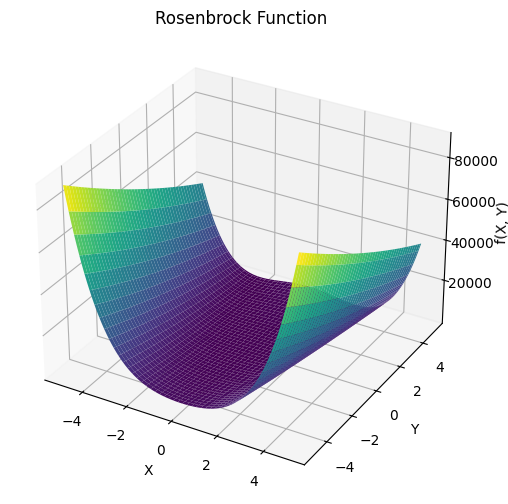

In [18]:
# Define the Rosenbrock function
def rosenbrock(x_, y_):
    return (1 - x_)**2 + 100 * (y_ - x_**2)**2

x_range = np.linspace(-5, 5, 100)
y_range = np.linspace(-5, 5, 100)
x_values, y_values = np.meshgrid(x_range, y_range)

# Calculate function values for the entire grid
z_values = rosenbrock(x_values, y_values)

# Plot surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_values, y_values, z_values, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('Rosenbrock Function')

# Show the plot
plt.show()


In [19]:
initial_x, initial_y = (-2, 2)


In [20]:
def plot_optimization_results(function_values, changes):
    # Plot Function Values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.plot(function_values, color='b', linestyle='-')
    plt.xlabel('Iteration')
    plt.ylabel('Function Value')
    plt.title('Function Value over Iterations')

    # Plot x and y Changes
    plt.subplot(1, 3, 2)
    x_changes = [change[0] for change in changes]
    y_changes = [change[1] for change in changes]
    plt.plot(x_changes, color='r', linestyle='-', label='x_change')
    plt.plot(y_changes, color='g', linestyle='-', label='y_change')
    plt.xlabel('Iteration')
    plt.ylabel('Change')
    plt.legend()
    plt.title('Change in x and y over Iterations')

    plt.tight_layout()
    plt.show()


Converged. Stopping gradient descent.
Momentum results: x: -1.21602743937429 y: 1.49188120408218 f: 4.92809214736286


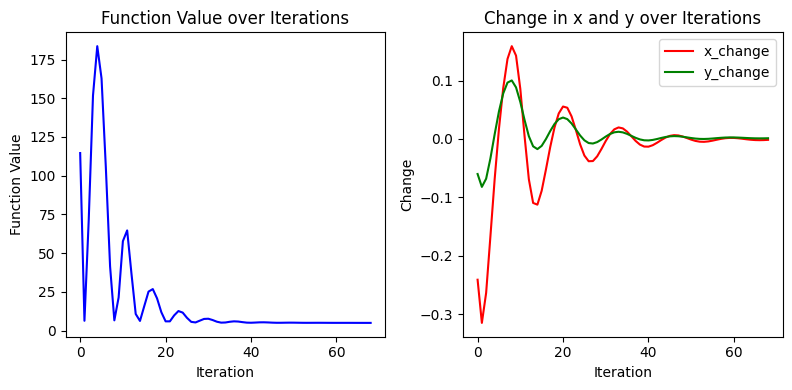

In [21]:
mom_x, mom_y, momentum_history, momentum_change_history = gradient_descent_momentum(f, initial_x, initial_y, der_x, der_y,
                                                                                    beta=0.85, learning_rate=0.001)
print('Momentum results:', 'x:', mom_x[-1], 'y:', mom_y[-1], 'f:', momentum_history[-1])
plot_optimization_results(momentum_history, momentum_change_history)


Converged. Stopping gradient descent.
Momentum results: x: 0.411436002374410 y: 0.155872372732503 f: 0.364382910831775


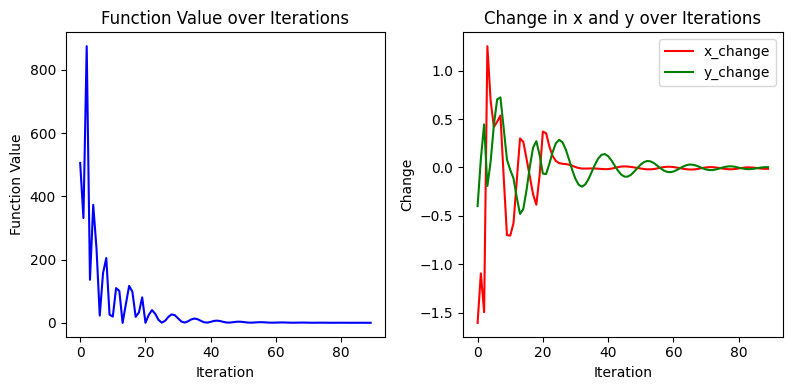

In [22]:
mom_x, mom_y, momentum_history, momentum_change_history = gradient_descent_momentum(f, initial_x, initial_y, der_x, der_y,
                                                                                    beta=0.9, learning_rate=0.01)
print('Momentum results:', 'x:', mom_x[-1], 'y:', mom_y[-1], 'f:', momentum_history[-1])
plot_optimization_results(momentum_history, momentum_change_history)


Converged. Stopping gradient descent.
Momentum results: x: 0.729354378854036 y: 0.524084474784617 f: 0.0794479929137311


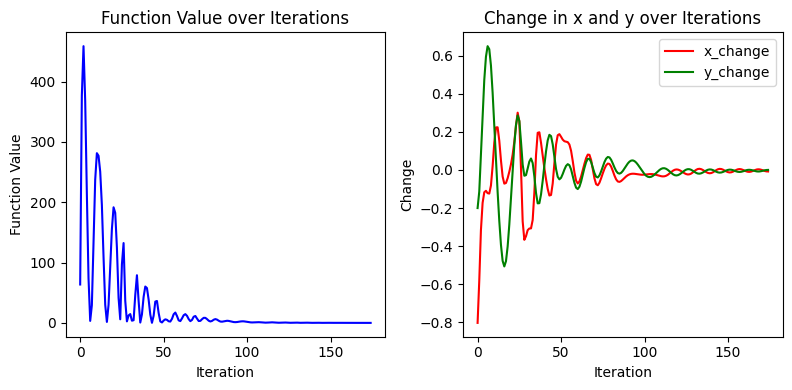

In [23]:
mom_x, mom_y, momentum_history, momentum_change_history = gradient_descent_momentum(f, initial_x, initial_y, der_x, der_y,
                                                                                    beta=0.95, learning_rate=0.01)
print('Momentum results:', 'x:', mom_x[-1], 'y:', mom_y[-1], 'f:', momentum_history[-1])
plot_optimization_results(momentum_history, momentum_change_history)


#### ADAM

Converged. Stopping gradient descent.
Adam results: x: -1.56431674099736 y: 2.45345261113992 f: 6.57977261906840


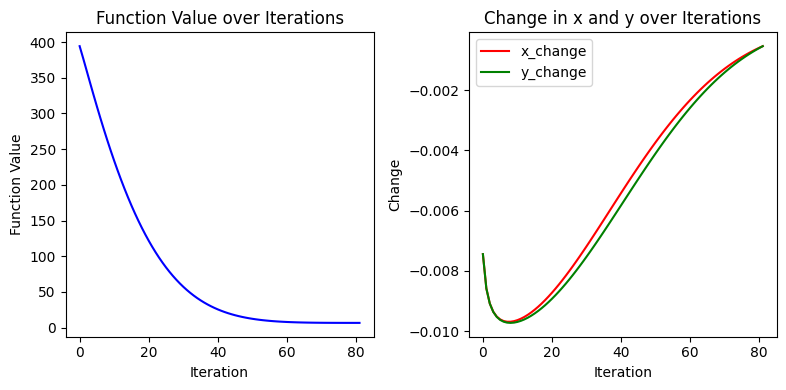

In [24]:
adam_x, adam_y, adam_history, adam_change_history = adam_optimizer(f, der_x, der_y, initial_x, initial_y, beta1=0.9, beta2=0.999, num_iters=3000)
print('Adam results:', 'x:', adam_x[-1], 'y:', adam_y[-1], 'f:', adam_history[-1])
plot_optimization_results(adam_history, adam_change_history)


Converged. Stopping gradient descent.
Adam results: x: -1.52584947128935 y: 2.32756923389638 f: 6.37995746106959


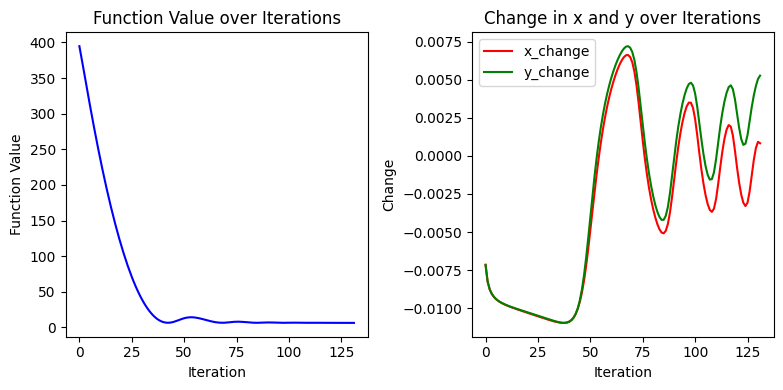

In [25]:
adam_x, adam_y, adam_history, adam_change_history = adam_optimizer(f, der_x, der_y, initial_x, initial_y, beta1=0.9, beta2=0.85, num_iters=3000)
print('Adam results:', 'x:', adam_x[-1], 'y:', adam_y[-1], 'f:', adam_history[-1])
plot_optimization_results(adam_history, adam_change_history)


Converged. Stopping gradient descent.
Adam results: x: 0.869043883045601 y: 0.756478196078929 f: 0.0173034941575630


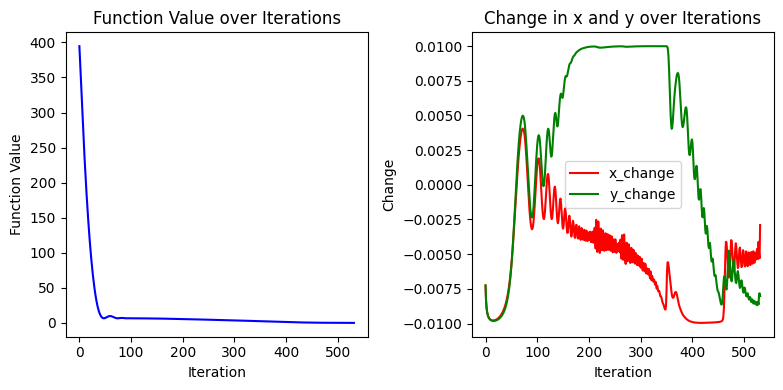

In [26]:
adam_x, adam_y, adam_history, adam_change_history = adam_optimizer(f, der_x, der_y, initial_x, initial_y, beta1=0.9, beta2=0.9, num_iters=3000)
print('Adam results:', 'x:', adam_x[-1], 'y:', adam_y[-1], 'f:', adam_history[-1])
plot_optimization_results(adam_history, adam_change_history)


In optimizing the same function using Adam and momentum optimization algorithms, significant differences in stability and convergence behavior were evident. Momentum optimization exhibited rapid convergence, albeit with less stability, as function values fluctuated notably at each iteration. However, the absolute changes in x and y were smaller during each step of the optimization process. Conversely, Adam optimization demonstrated a more stable and monotonic convergence, with smaller absolute changes in x and y. 

Notably, accurate parameter selection played a pivotal role; with fine-tuning, Adam consistently outperformed momentum, offering better accuracy in convergence. While momentum might converge faster, its accuracy may be compromised. These observations underscore the critical role of precise parameter adjustment, revealing that with accurate parameter selection, Adam can achieve superior accuracy, making it a more reliable choice for optimization tasks requiring both stability and precision.